In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    roc_auc_score
)
import joblib

In [5]:
# =====================================================
# 1. LOAD DATASET
# =====================================================
df = pd.read_csv("diabetes_prediction.csv")   # pastikan nama file benar
print(df.head())

print("\n=== Informasi Dataset ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
display(df.describe())

print("\n=== Jumlah Nilai Hilang per Kolom ===")
print(df.isnull().sum())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               50000 non-null  object 


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,41.853041,0.075200,0.038920,27.340703,5.526810,137.835460,0.086400
std,22.482810,0.263716,0.193406,6.662021,1.073774,40.977049,0.280957
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.637500,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.600000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000



=== Jumlah Nilai Hilang per Kolom ===
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


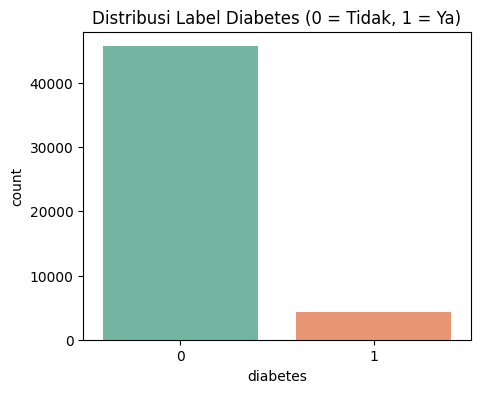

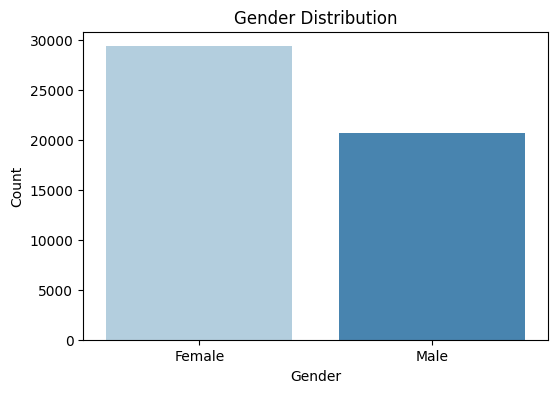

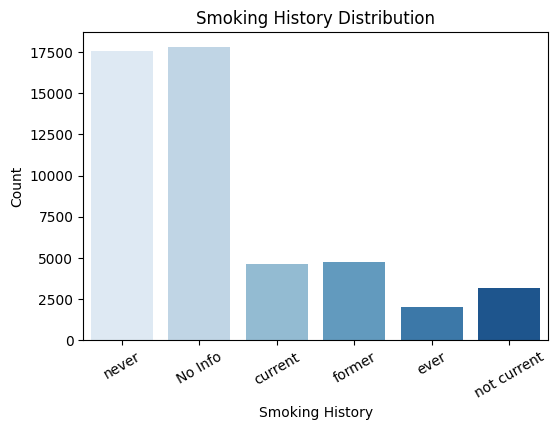

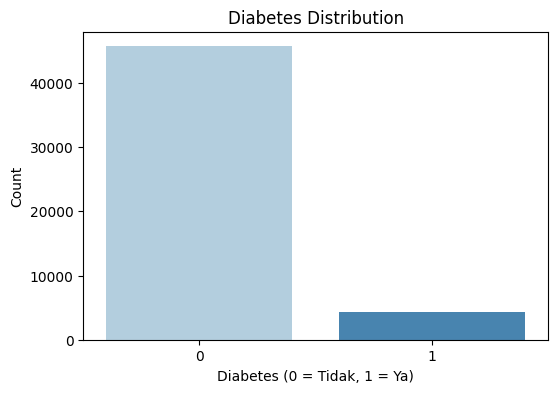

c:\Users\intan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


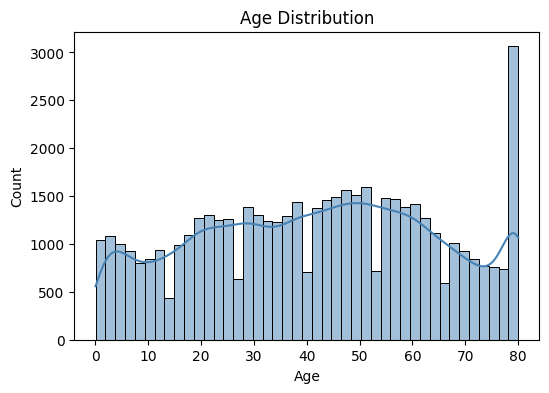

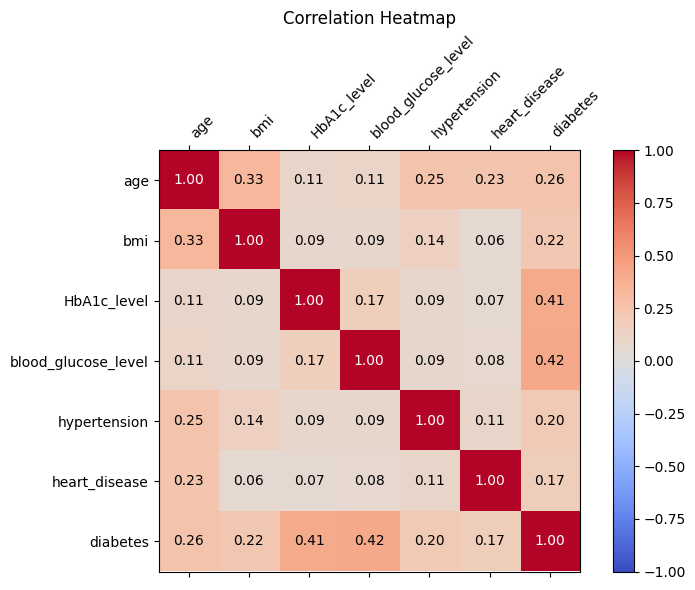

In [6]:
# =====================================================
# 2. VISUALISASI DATA
# =====================================================

# Distribusi Target (label diabetes)
plt.figure(figsize=(5, 4))
sns.countplot(x='diabetes', data=df, palette='Set2')
plt.title("Distribusi Label Diabetes (0 = Tidak, 1 = Ya)")
plt.show()
plt.close()  # pastikan figure ditutup dan tidak tersisa untuk disimpan

# --- GRAFIK TAMBAHAN: gunakan salinan df supaya tidak mengubah data asli ---
df_viz = df.copy()
df_viz["gender"] = df_viz["gender"].str.replace("Other", "Female")

# 1) Distribusi Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df_viz, palette='Blues')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
plt.close()

# 2) Distribusi Smoking History
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking_history', data=df_viz, palette='Blues')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Smoking History Distribution')
plt.xticks(rotation=30)
plt.show()
plt.close()

# 3) Distribusi Diabetes (versi lain)
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df_viz, palette='Blues')
plt.title("Diabetes Distribution")
plt.xlabel("Diabetes (0 = Tidak, 1 = Ya)")
plt.ylabel("Count")
plt.show()
plt.close()

# 4) Distribusi Umur
plt.figure(figsize=(6, 4))
sns.histplot(df_viz['age'], kde=True, color='steelblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
plt.close()

# --- Heatmap Korelasi ---
num_cols = ["age", "bmi", "HbA1c_level", "blood_glucose_level",
            "hypertension", "heart_disease", "diabetes"]

corr_matrix = df[num_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
fig.colorbar(cax)

ax.set_xticks(np.arange(len(num_cols)))
ax.set_yticks(np.arange(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=45, ha="left")
ax.set_yticklabels(num_cols)

for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        c = corr_matrix.iloc[i, j]
        ax.text(
            j, i, f"{c:.2f}",
            va="center", ha="center",
            color="black" if abs(c) < 0.5 else "white"
        )

ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()
plt.close(fig)


In [7]:
# =====================================================
# 3. PERSIAPAN DATA
# =====================================================
FEATURES = [
    'gender',
    'age',
    'hypertension',
    'heart_disease',
    'smoking_history',
    'bmi',
    'HbA1c_level',
    'blood_glucose_level'
]
TARGET = 'diabetes'

X = df[FEATURES]
y = df[TARGET]

# Encode fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Simpan nama kolom fitur setelah encoding
feature_columns = X.columns.tolist()

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Jumlah Data Latih:", len(X_train))
print("Jumlah Data Uji  :", len(X_test))

Jumlah Data Latih: 37500
Jumlah Data Uji  : 12500


In [8]:
# =====================================================
# 4. TRAINING MODEL LOGISTIC REGRESSION
# =====================================================
model_lr = LogisticRegression(max_iter=500, class_weight='balanced')
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)


=== Classification Report (Logistic Regression) ===
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     11420
           1       0.43      0.90      0.58      1080

    accuracy                           0.89     12500
   macro avg       0.71      0.89      0.76     12500
weighted avg       0.94      0.89      0.90     12500


Confusion Matrix:
[[10125  1295]
 [  113   967]]

Akurasi Model Logistic Regression: 0.8874


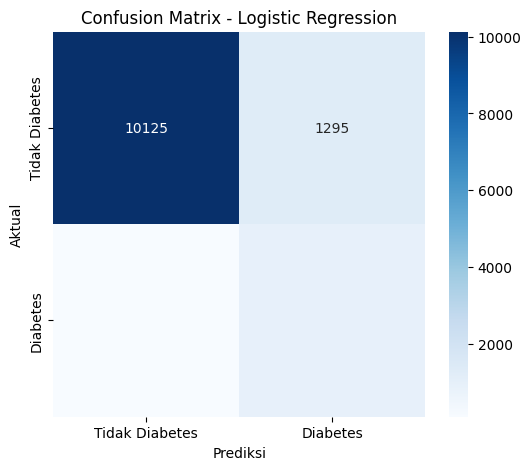

In [9]:
# =====================================================
# 5. EVALUASI MODEL
# =====================================================
print("\n=== Classification Report (Logistic Regression) ===")
print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(cm)

akurasi = accuracy_score(y_test, y_pred_lr)
print(f"\nAkurasi Model Logistic Regression: {akurasi:.4f}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Tidak Diabetes', 'Diabetes'],
    yticklabels=['Tidak Diabetes', 'Diabetes']
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
plt.close()


AUC Logistic Regression: 0.9647


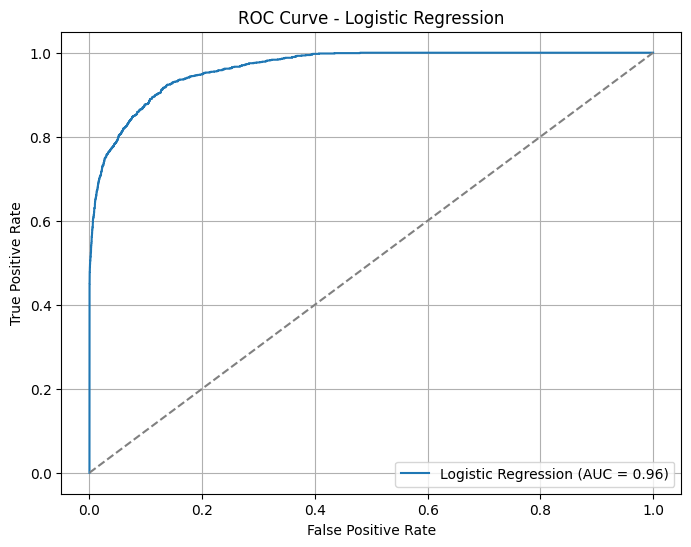

In [10]:
# =====================================================
# 6. ROC CURVE & AUC
# =====================================================
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\nAUC Logistic Regression: {auc_lr:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()
plt.close()

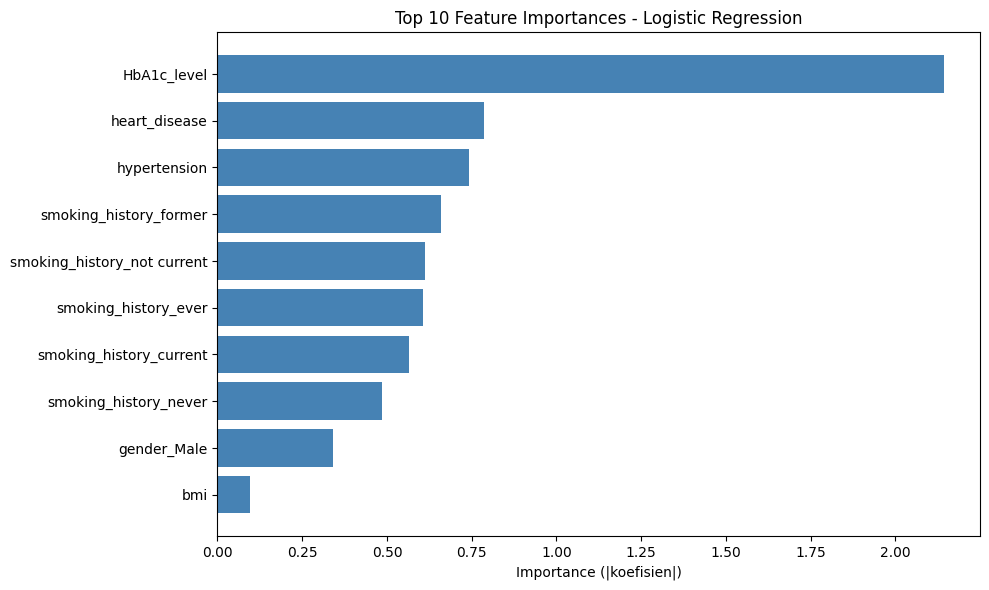

,Feature,Importance
4,HbA1c_level,2.142571
2,heart_disease,0.785309
1,hypertension,0.742226
10,smoking_history_former,0.659583
12,smoking_history_not current,0.610852
9,smoking_history_ever,0.607431
8,smoking_history_current,0.564660
11,smoking_history_never,0.485698
6,gender_Male,0.341406
3,bmi,0.095394


In [11]:
# =====================================================
# 7. FEATURE IMPORTANCE - LOGISTIC REGRESSION
# =====================================================
coeffs = model_lr.coef_[0]
feature_names = X.columns

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": np.abs(coeffs)
}).sort_values(by="Importance", ascending=False)

top_n = 10
top_feat = feat_imp.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_feat["Feature"][::-1], top_feat["Importance"][::-1], color="steelblue")
plt.xlabel("Importance (|koefisien|)")
plt.title(f"Top {top_n} Feature Importances - Logistic Regression")
plt.tight_layout()
plt.show()
plt.close()

top_feat

In [12]:
# =====================================================
# 8. SIMPAN MODEL
# =====================================================
joblib.dump(model_lr, "model_logistic.pkl")
joblib.dump(feature_columns, "model_columns.pkl")
print("\nModel berhasil disimpan sebagai model_logistic.pkl")
print("Daftar kolom fitur disimpan sebagai model_columns.pkl")


Model berhasil disimpan sebagai model_logistic.pkl
Daftar kolom fitur disimpan sebagai model_columns.pkl


In [13]:
# =====================================================
# 9. KESIMPULAN
# =====================================================
print("\n=== KESIMPULAN ===")
print(f"Akurasi Logistic Regression: {akurasi:.4f}")
print(f"AUC Logistic Regression    : {auc_lr:.4f}")

if akurasi >= 0.75:
    print("Model Logistic Regression memiliki performa baik untuk prediksi diabetes.")
else:
    print("Model masih dapat ditingkatkan dengan normalisasi, tuning parameter, atau menambah fitur.")


=== KESIMPULAN ===
Akurasi Logistic Regression: 0.8874
AUC Logistic Regression    : 0.9647
Model Logistic Regression memiliki performa baik untuk prediksi diabetes.
